## 1. Perform pre-processing of all the variables

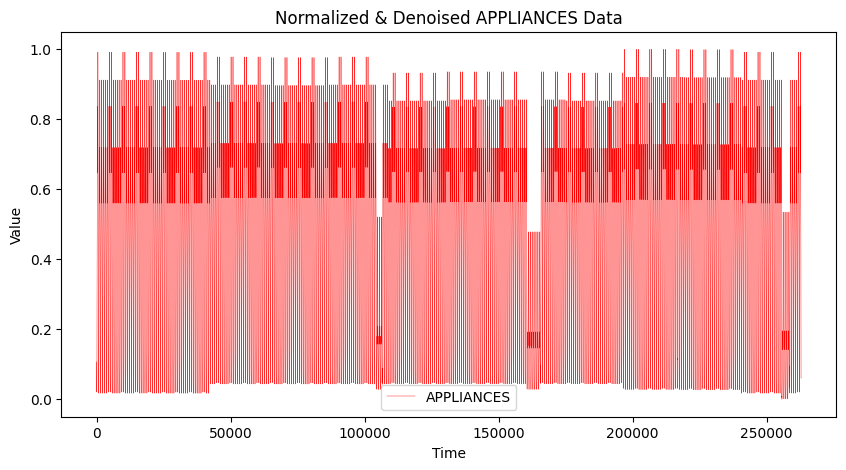

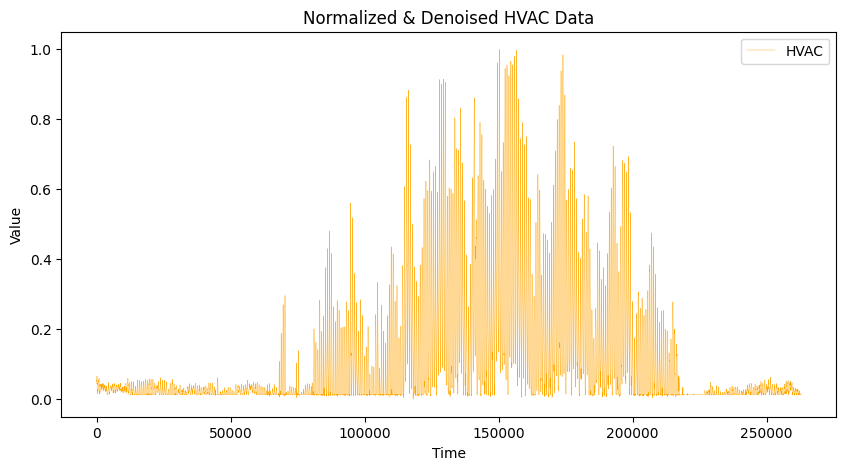

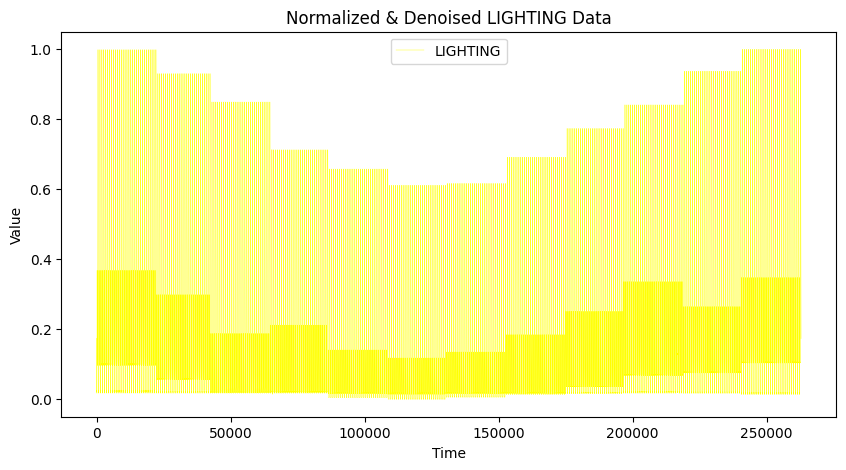

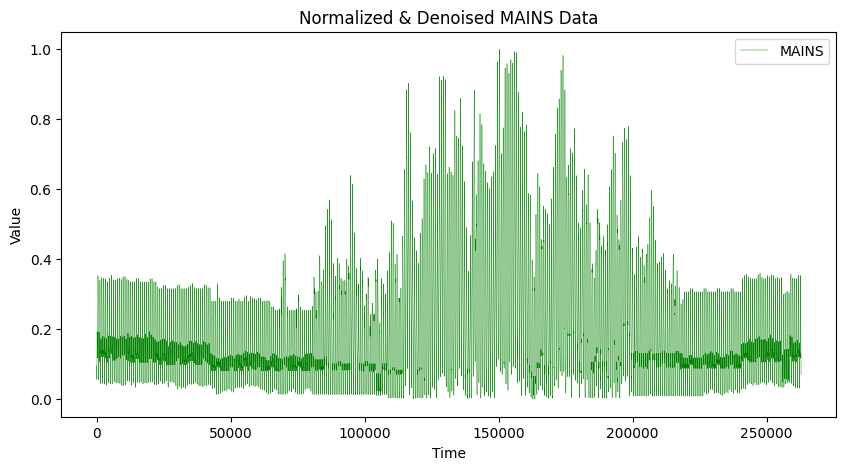

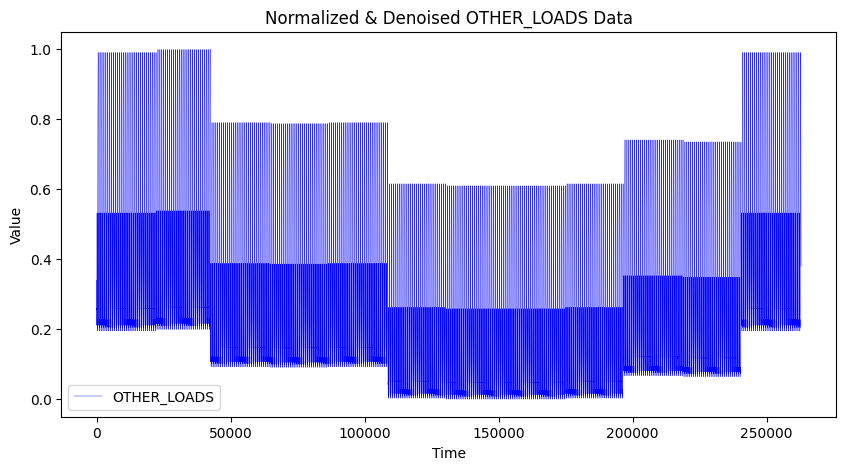

In [17]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# Load the .mat file
file_path_0 = "APPLIANCES.mat"
file_path_1 = "HVAC.mat"
file_path_2 = "LIGHTING.mat"
file_path_3 = "MAINS.mat"
file_path_4 = "OTHER_LOADS.mat"

mat_data_0 = scipy.io.loadmat(file_path_0)
mat_data_1 = scipy.io.loadmat(file_path_1)
mat_data_2 = scipy.io.loadmat(file_path_2)
mat_data_3 = scipy.io.loadmat(file_path_3)
mat_data_4 = scipy.io.loadmat(file_path_4)

# Extract the column data
mat_data_0.keys() #y4
mat_data_1.keys() #y2
mat_data_2.keys() #y3
mat_data_3.keys() #y1
mat_data_4.keys() #y5

# Extract the relevant data
data_0 = mat_data_0['y4'].squeeze()
data_1 = mat_data_1['y2'].squeeze()
data_2 = mat_data_2['y3'].squeeze()
data_3 = mat_data_3['y1'].squeeze()
data_4 = mat_data_4['y5'].squeeze()

# Normalize the data to [0,1] range
normalized_data_0 = (data_0 - np.min(data_0)) / (np.max(data_0) - np.min(data_0))
normalized_data_1 = (data_1 - np.min(data_1)) / (np.max(data_1) - np.min(data_1))
normalized_data_2 = (data_2 - np.min(data_2)) / (np.max(data_2) - np.min(data_2))
normalized_data_3 = (data_3 - np.min(data_3)) / (np.max(data_3) - np.min(data_3))
normalized_data_4 = (data_4 - np.min(data_4)) / (np.max(data_4) - np.min(data_4))

# Apply median filtering for denoising
denoised_data_0 = medfilt(normalized_data_0, kernel_size=5)
denoised_data_1 = medfilt(normalized_data_1, kernel_size=5)
denoised_data_2 = medfilt(normalized_data_2, kernel_size=5)
denoised_data_3 = medfilt(normalized_data_3, kernel_size=5)
denoised_data_4 = medfilt(normalized_data_4, kernel_size=5)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(denoised_data_0, label='APPLIANCES', linewidth=0.3, color='red')
plt.legend()
plt.title("Normalized & Denoised APPLIANCES Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(denoised_data_1, label='HVAC', linewidth=0.3, color='orange')
plt.legend()
plt.title("Normalized & Denoised HVAC Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(denoised_data_2, label='LIGHTING', linewidth=0.3, color='yellow')
plt.legend()
plt.title("Normalized & Denoised LIGHTING Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(denoised_data_3, label='MAINS', linewidth=0.3, color='green')
plt.legend()
plt.title("Normalized & Denoised MAINS Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(denoised_data_4, label='OTHER_LOADS', linewidth=0.3, color='blue')
plt.legend()
plt.title("Normalized & Denoised OTHER_LOADS Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

## 2. Use direct Euclidean distance metric

In [2]:
from scipy.spatial.distance import euclidean
from itertools import combinations

# List of denoised data variables
denoised_data_list = {
    "APPLIANCES": denoised_data_0,
    "HVAC": denoised_data_1,
    "LIGHTING": denoised_data_2,
    "MAINS": denoised_data_3,
    "OTHER_LOADS": denoised_data_4,
}

# Compute Euclidean distance between each pair
distance_results = []
for (name1, data1), (name2, data2) in combinations(denoised_data_list.items(), 2):
    # Ensure both datasets have the same length before computing distance
    min_length = min(len(data1), len(data2))
    distance = euclidean(data1[:min_length], data2[:min_length])
    distance_results.append({"Dataset 1": name1, "Dataset 2": name2, "Euclidean Distance": distance})

# Convert results to DataFrame and display
distance_df = pd.DataFrame(distance_results)
print(distance_df)

    Dataset 1    Dataset 2  Euclidean Distance
0  APPLIANCES         HVAC          225.775756
1  APPLIANCES     LIGHTING          214.058548
2  APPLIANCES        MAINS          178.675689
3  APPLIANCES  OTHER_LOADS          180.526527
4        HVAC     LIGHTING          165.740671
5        HVAC        MAINS           59.873731
6        HVAC  OTHER_LOADS          185.011661
7    LIGHTING        MAINS          127.401316
8    LIGHTING  OTHER_LOADS           89.638285
9       MAINS  OTHER_LOADS          135.440520


## 3.  Convert the data to frequency domain using FFT and then do a comparison using euclidean distance metric

In [3]:
from scipy.fft import fft

# Compute FFT and normalize magnitudes
fft_data_list = {}
for key, data in denoised_data_list.items():
    fft_magnitude = np.abs(fft(data))  # Compute magnitude spectrum
    fft_magnitude = fft_magnitude[:len(fft_magnitude) // 2]  # Keep only positive frequencies
    #fft_magnitude = (fft_magnitude - np.min(fft_magnitude)) / (np.max(fft_magnitude) - np.min(fft_magnitude))  # Normalize
    fft_data_list[key] = fft_magnitude

# Compute Euclidean distance between each pair in the frequency domain
fft_distance_results = []
for (name1, data1), (name2, data2) in combinations(fft_data_list.items(), 2):
    # Ensure both datasets have the same length before computing distance
    min_length = min(len(data1), len(data2))
    distance = euclidean(data1[:min_length], data2[:min_length])
    fft_distance_results.append({"Dataset 1": name1, "Dataset 2": name2, "Euclidean Distance (FFT)" : distance})

# Convert FFT distance results to DataFrame and display
fft_distance_df = pd.DataFrame(fft_distance_results)
print(fft_distance_df)


    Dataset 1    Dataset 2  Euclidean Distance (FFT)
0  APPLIANCES         HVAC              98739.685828
1  APPLIANCES     LIGHTING              71930.042160
2  APPLIANCES        MAINS              74318.226722
3  APPLIANCES  OTHER_LOADS              45263.964617
4        HVAC     LIGHTING              41750.973197
5        HVAC        MAINS              25011.315487
6        HVAC  OTHER_LOADS              62282.427679
7    LIGHTING        MAINS              26929.831278
8    LIGHTING  OTHER_LOADS              32195.375360
9       MAINS  OTHER_LOADS              39464.645941


## 4. Use KL Divergence metric and perform comparison

In [4]:
from scipy.stats import entropy  # KL Divergence function

# Compute histograms as probability distributions
def compute_probability_distribution(data, bins=100):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)  # Density=True normalizes the histogram
    hist += 1e-10  # Add small constant to avoid log(0)
    return hist / np.sum(hist)  # Normalize to make it a probability distribution

# Compute KL divergence between each pair
kl_distance_results = []
for (name1, data1), (name2, data2) in combinations(denoised_data_list.items(), 2):
    P = compute_probability_distribution(data1)
    Q = compute_probability_distribution(data2)
    
    kl_pq = entropy(P, Q)  # KL divergence P || Q
    kl_qp = entropy(Q, P)  # KL divergence Q || P
    sym_kl = (kl_pq + kl_qp) / 2  # Symmetric KL divergence

    kl_distance_results.append({
        "Dataset 1": name1, 
        "Dataset 2": name2, 
        "KL Divergence (P || Q)": kl_pq, 
        "KL Divergence (Q || P)": kl_qp,
        "Symmetric KL Divergence": sym_kl
    })

# Convert results to DataFrame and display
kl_distance_df = pd.DataFrame(kl_distance_results)
print(kl_distance_df)


    Dataset 1    Dataset 2  KL Divergence (P || Q)  KL Divergence (Q || P)  \
0  APPLIANCES         HVAC                1.401653                1.911618   
1  APPLIANCES     LIGHTING                0.675513                0.933110   
2  APPLIANCES        MAINS                0.969870                0.710261   
3  APPLIANCES  OTHER_LOADS                0.427758                0.435680   
4        HVAC     LIGHTING                0.369101                0.454367   
5        HVAC        MAINS                0.832100                0.630246   
6        HVAC  OTHER_LOADS                1.055274                0.796493   
7    LIGHTING        MAINS                0.358552                0.305726   
8    LIGHTING  OTHER_LOADS                0.397047                0.339702   
9       MAINS  OTHER_LOADS                0.205768                0.261751   

   Symmetric KL Divergence  
0                 1.656636  
1                 0.804311  
2                 0.840065  
3                 0.43171

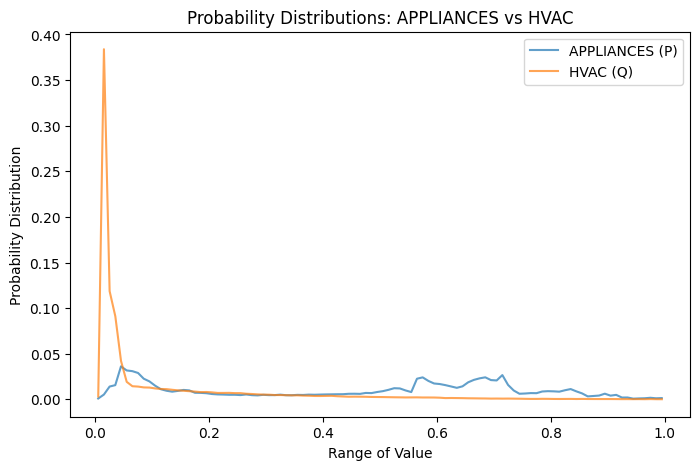

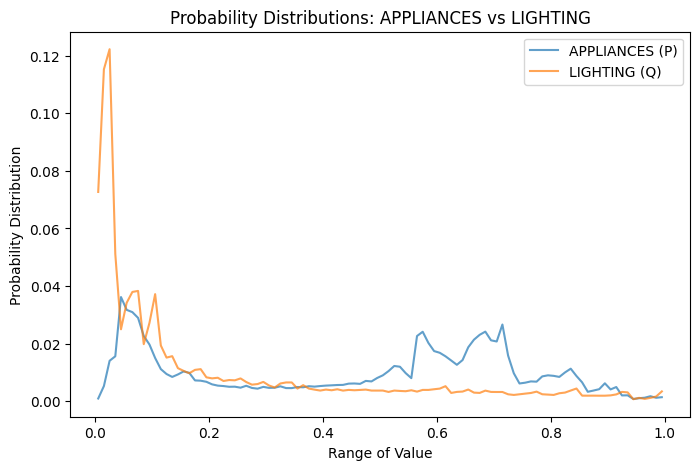

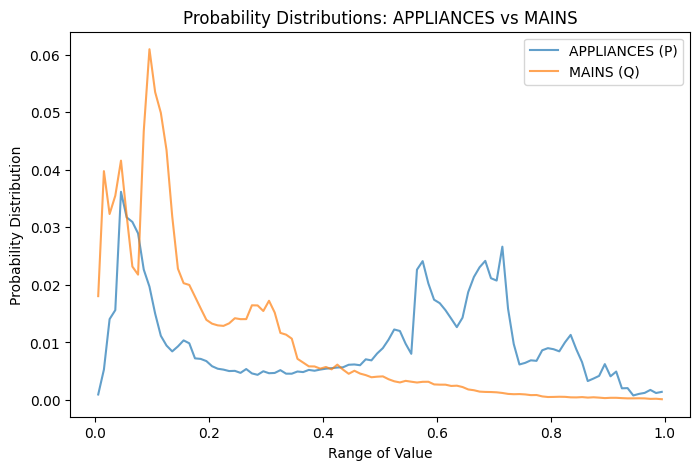

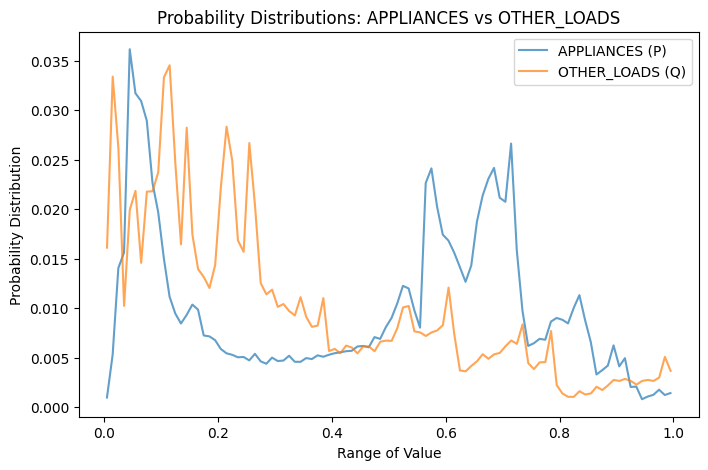

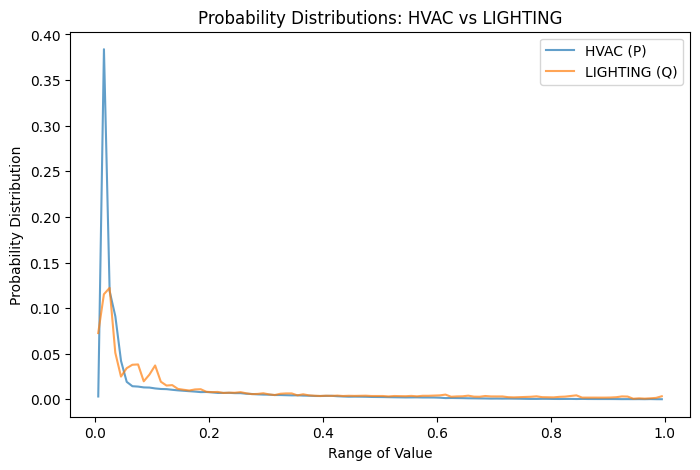

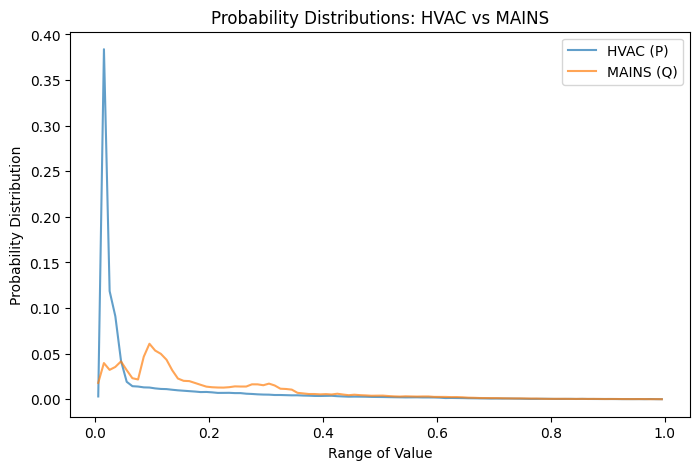

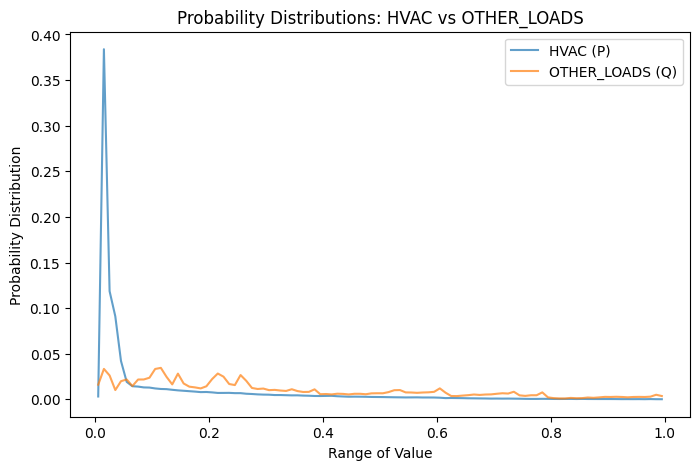

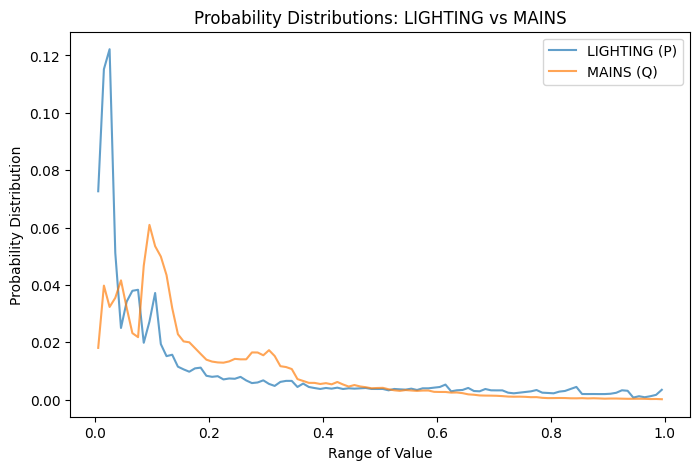

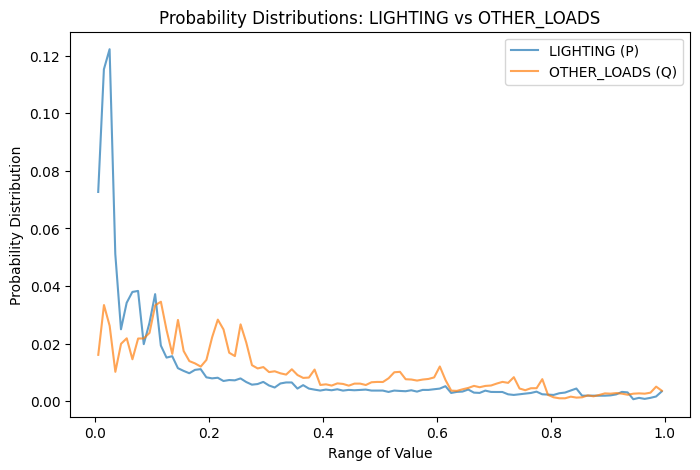

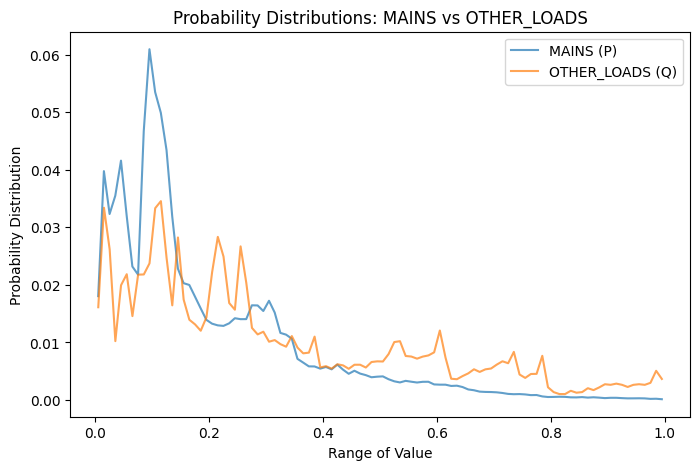

    Dataset 1    Dataset 2  KL Divergence (P || Q)  KL Divergence (Q || P)  \
0  APPLIANCES         HVAC                1.401653                1.911618   
1  APPLIANCES     LIGHTING                0.675513                0.933110   
2  APPLIANCES        MAINS                0.969870                0.710261   
3  APPLIANCES  OTHER_LOADS                0.427758                0.435680   
4        HVAC     LIGHTING                0.369101                0.454367   
5        HVAC        MAINS                0.832100                0.630246   
6        HVAC  OTHER_LOADS                1.055274                0.796493   
7    LIGHTING        MAINS                0.358552                0.305726   
8    LIGHTING  OTHER_LOADS                0.397047                0.339702   
9       MAINS  OTHER_LOADS                0.205768                0.261751   

   Symmetric KL Divergence  
0                 1.656636  
1                 0.804311  
2                 0.840065  
3                 0.43171

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
from itertools import combinations

# Compute histograms as probability distributions
def compute_probability_distribution(data, bins=100):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)  # Density=True normalizes the histogram
    hist += 1e-10  # Add small constant to avoid log(0)
    return hist / np.sum(hist), bin_edges  # Normalize to make it a probability distribution

# Compute KL divergence between each pair
kl_distance_results = []
for (name1, data1), (name2, data2) in combinations(denoised_data_list.items(), 2):
    P, bins1 = compute_probability_distribution(data1)
    Q, bins2 = compute_probability_distribution(data2)
    
    kl_pq = entropy(P, Q)  # KL divergence P || Q
    kl_qp = entropy(Q, P)  # KL divergence Q || P
    sym_kl = (kl_pq + kl_qp) / 2  # Symmetric KL divergence

    kl_distance_results.append({
        "Dataset 1": name1, 
        "Dataset 2": name2, 
        "KL Divergence (P || Q)": kl_pq, 
        "KL Divergence (Q || P)": kl_qp,
        "Symmetric KL Divergence": sym_kl
    })

    # Plot probability distributions
    plt.figure(figsize=(8, 5))
    bin_centers1 = (bins1[:-1] + bins1[1:]) / 2
    bin_centers2 = (bins2[:-1] + bins2[1:]) / 2

    plt.plot(bin_centers1, P, label=f'{name1} (P)', alpha=0.7)
    plt.plot(bin_centers2, Q, label=f'{name2} (Q)', alpha=0.7)

    plt.xlabel("Range of Value")
    plt.ylabel("Probability Distribution")
    plt.title(f"Probability Distributions: {name1} vs {name2}")
    plt.legend()
    plt.show()

# Convert results to DataFrame and display
kl_distance_df = pd.DataFrame(kl_distance_results)
print(kl_distance_df)


## 5. Compare the data in wavelet transformed space

In [5]:
#pip install PyWavelets

In [7]:
import pywt

# Function to compute wavelet coefficients
def wavelet_transform(data, wavelet='db4', level=3):
    coeffs = pywt.wavedec(data, wavelet, level=level)  # Perform wavelet decomposition
    flattened_coeffs = np.hstack([np.abs(c) for c in coeffs])  # Flatten all coefficients
    flattened_coeffs = (flattened_coeffs - np.min(flattened_coeffs)) / (np.max(flattened_coeffs) - np.min(flattened_coeffs))  # Normalize
    return flattened_coeffs

# Compute wavelet-transformed data
wavelet_data_list = {key: wavelet_transform(data) for key, data in denoised_data_list.items()}

# Compute Euclidean distance in wavelet-transformed space
wavelet_distance_results = []
for (name1, data1), (name2, data2) in combinations(wavelet_data_list.items(), 2):
    min_length = min(len(data1), len(data2))  # Ensure same length
    distance = euclidean(data1[:min_length], data2[:min_length])
    wavelet_distance_results.append({"Dataset 1": name1, "Dataset 2": name2, "Euclidean Distance (Wavelet)": distance})

# Convert to DataFrame and display results
wavelet_distance_df = pd.DataFrame(wavelet_distance_results)
print(wavelet_distance_df)


    Dataset 1    Dataset 2  Euclidean Distance (Wavelet)
0  APPLIANCES         HVAC                     79.830651
1  APPLIANCES     LIGHTING                     75.686942
2  APPLIANCES        MAINS                     63.158044
3  APPLIANCES  OTHER_LOADS                     63.836872
4        HVAC     LIGHTING                     58.742306
5        HVAC        MAINS                     21.195518
6        HVAC  OTHER_LOADS                     65.472454
7    LIGHTING        MAINS                     45.157723
8    LIGHTING  OTHER_LOADS                     31.693788
9       MAINS  OTHER_LOADS                     47.931162


The above portion is doing Euclidean Distance. It's better for only numerical comparison. (Doing clustering or classification)

In [12]:
# Function to compute energy of wavelet coefficients
def compute_wavelet_energy(data, wavelet='db4', level=3):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    energy_ratios = [np.sum(np.abs(c) ** 2) for c in coeffs]  # Compute energy per level
    return np.array(energy_ratios) / np.sum(energy_ratios)  # Normalize energy

# Compute energy distribution for each dataset
wavelet_energy_list = {key: compute_wavelet_energy(data) for key, data in denoised_data_list.items()}

# Get the number of wavelet levels from any computed result
num_levels = len(next(iter(wavelet_energy_list.values())))  # Get levels from the first dataset

# Create DataFrame using the correct number of columns
wavelet_energy_df = pd.DataFrame.from_dict(wavelet_energy_list, orient="index", columns=[f"Level {i}" for i in range(num_levels)])

# Display the DataFrame
print(wavelet_energy_df)


             Level 0       Level 1       Level 2       Level 3
APPLIANCES       1.0  4.292378e-08  5.318834e-09  1.036439e-09
HVAC             1.0  7.230148e-08  7.670983e-09  1.663012e-09
LIGHTING         1.0  1.274327e-07  1.393629e-08  2.768587e-09
MAINS            1.0  5.383949e-08  6.241233e-09  1.218359e-09
OTHER_LOADS      1.0  6.879243e-08  8.156537e-09  1.424223e-09


The above portion is doing Energy Ratio Comparison. It's better for compare frequency energy distributions across signals.

In [10]:
# Compute correlation matrix between wavelet coefficient vectors
wavelet_correlation_results = []
for (name1, data1), (name2, data2) in combinations(wavelet_data_list.items(), 2):
    min_length = min(len(data1), len(data2))
    correlation = np.corrcoef(data1[:min_length], data2[:min_length])[0, 1]
    wavelet_correlation_results.append({"Dataset 1": name1, "Dataset 2": name2, "Correlation": correlation})

# Convert results to DataFrame
wavelet_correlation_df = pd.DataFrame(wavelet_correlation_results)
print(wavelet_correlation_df)


    Dataset 1    Dataset 2  Correlation
0  APPLIANCES         HVAC     0.578520
1  APPLIANCES     LIGHTING     0.591614
2  APPLIANCES        MAINS     0.812827
3  APPLIANCES  OTHER_LOADS     0.725077
4        HVAC     LIGHTING     0.250769
5        HVAC        MAINS     0.897087
6        HVAC  OTHER_LOADS     0.395023
7    LIGHTING        MAINS     0.621640
8    LIGHTING  OTHER_LOADS     0.899816
9       MAINS  OTHER_LOADS     0.735246


The above portion is doing Correlation. It's better for compare the similarity in shape(directionless).

In [11]:
from scipy.spatial.distance import jensenshannon

# Compute JSD between wavelet coefficients
wavelet_jsd_results = []
for (name1, data1), (name2, data2) in combinations(wavelet_data_list.items(), 2):
    min_length = min(len(data1), len(data2))
    jsd = jensenshannon(data1[:min_length], data2[:min_length])
    wavelet_jsd_results.append({"Dataset 1": name1, "Dataset 2": name2, "Jensen-Shannon Divergence": jsd})

# Convert results to DataFrame
wavelet_jsd_df = pd.DataFrame(wavelet_jsd_results)
print(wavelet_jsd_df)


    Dataset 1    Dataset 2  Jensen-Shannon Divergence
0  APPLIANCES         HVAC                   0.428567
1  APPLIANCES     LIGHTING                   0.409328
2  APPLIANCES        MAINS                   0.229237
3  APPLIANCES  OTHER_LOADS                   0.326549
4        HVAC     LIGHTING                   0.574365
5        HVAC        MAINS                   0.269655
6        HVAC  OTHER_LOADS                   0.505906
7    LIGHTING        MAINS                   0.375309
8    LIGHTING  OTHER_LOADS                   0.234107
9       MAINS  OTHER_LOADS                   0.300467


The above portion is doing Jensen-Shannon Divergence. It's doing probability distributions of wavelet coefficients.

## 6. Use windowed spectrogram to identify motifs in the main power data to detect changes in time-series characteristics

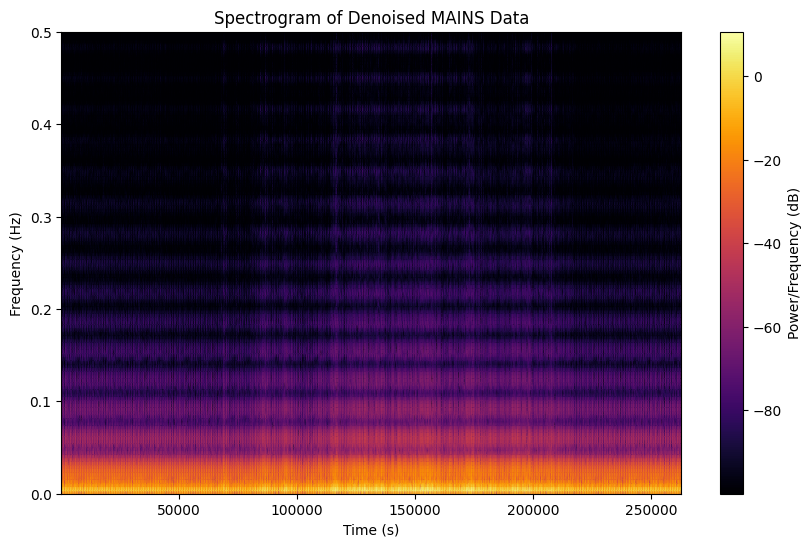

In [14]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np

# Parameters for STFT
fs = 1  # Sampling frequency (adjust if needed)
nperseg = 256  # Window size
noverlap = nperseg // 2  # Overlap between windows

# Compute STFT (spectrogram)
frequencies, times, Sxx = signal.spectrogram(denoised_data_3, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Convert to log scale for better visualization
Sxx_log = 10 * np.log10(Sxx + 1e-10)  # Avoid log(0)

# Plot Spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, Sxx_log, shading='gouraud', cmap='inferno')
plt.colorbar(label='Power/Frequency (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of Denoised MAINS Data')
plt.show()


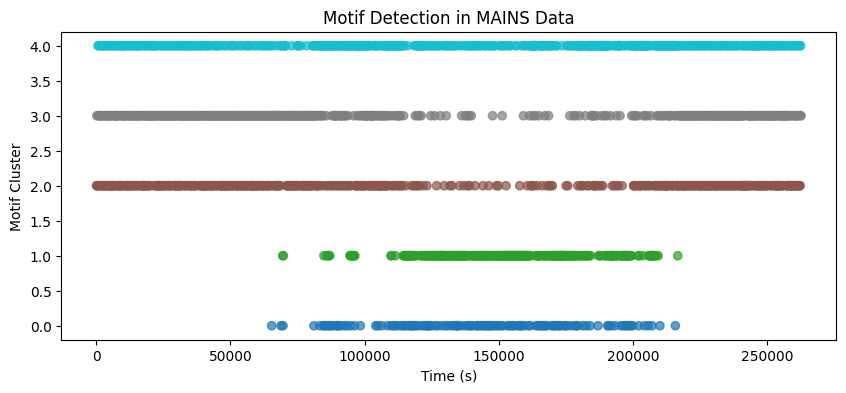

In [25]:
from sklearn.cluster import KMeans

# Reshape spectrogram for clustering (flatten time-frequency representation)
num_clusters = 5  # Adjust number of motifs to detect
spectrogram_features = Sxx_log.T  # Transpose so each row is a time slice

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
motif_labels = kmeans.fit_predict(spectrogram_features)

# Plot motif occurrences over time
plt.figure(figsize=(10, 4))
plt.scatter(times, motif_labels, c=motif_labels, cmap='tab10', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Motif Cluster')
plt.title('Motif Detection in MAINS Data')
plt.show()


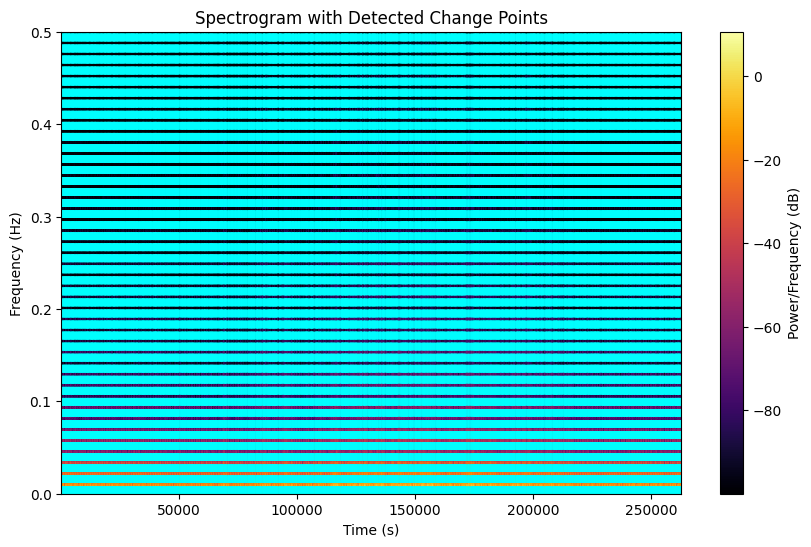

In [16]:
import numpy as np

# Compute transitions between motifs
change_points = np.where(np.diff(motif_labels) != 0)[0]  # Find indices where cluster changes

# Plot detected change points on spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, Sxx_log, shading='gouraud', cmap='inferno')
plt.colorbar(label='Power/Frequency (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram with Detected Change Points')

# Overlay change points
for cp in change_points:
    plt.axvline(times[cp], color='cyan', linestyle='--', alpha=0.8)

plt.show()
